# 任务一：读取数据，查看字段类型

In [1]:
#import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from pandas import Series,DataFrame 
import category_encoders as ce

In [2]:
#%% 导入训练集数据并查看前5行
train_df = pd.read_csv("E:/学习/2021-2022学年学习文件/研一下课程文件/Python编程项目/糖尿病遗传风险预测挑战赛公开数据/比赛训练集.csv",engine='python',encoding='gbk')
train_df.head()

,编号,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
0,1,0,1996,30.1,无记录,106.0,3.818,7.89,0.0,0
1,2,0,1988,27.5,无记录,84.0,-1.000,0.00,14.7,0
2,3,1,1988,36.5,无记录,85.0,7.131,0.00,40.1,1
3,4,1,1992,29.5,无记录,91.0,7.041,0.00,0.0,0
4,5,0,1998,42.0,叔叔或者姑姑有一方患有糖尿病,NaN,7.134,0.00,0.0,1


In [3]:
#%% 导入测试集数据并查看前5行
test_df = pd.read_csv("E:/学习/2021-2022学年学习文件/研一下课程文件/Python编程项目/糖尿病遗传风险预测挑战赛公开数据/比赛测试集.csv",engine='python',encoding='gbk')
test_df.head()

,编号,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度
0,1,0,1987,33.1,无记录,72.0,6.586,24.16,2.94
1,2,0,1998,20.6,叔叔或者姑姑有一方患有糖尿病,68.0,3.861,0.00,0.00
2,3,1,1979,42.1,无记录,98.0,5.713,0.00,3.53
3,4,0,1999,34.6,无记录,66.0,4.684,0.00,3.14
4,5,0,1997,27.7,无记录,89.0,7.948,14.65,2.65


In [4]:
train_df.columns

Index(['编号', '性别', '出生年份', '体重指数', '糖尿病家族史', '舒张压', '口服耐糖量测试', '胰岛素释放实验',
       '肱三头肌皮褶厚度', '患有糖尿病标识'],
      dtype='object')

In [5]:
test_df.columns

Index(['编号', '性别', '出生年份', '体重指数', '糖尿病家族史', '舒张压', '口服耐糖量测试', '胰岛素释放实验',
       '肱三头肌皮褶厚度'],
      dtype='object')

In [6]:
train_df.shape

(5070, 10)

In [7]:
test_df.shape

(1000, 9)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   编号        5070 non-null   int64  
 1   性别        5070 non-null   int64  
 2   出生年份      5070 non-null   int64  
 3   体重指数      5070 non-null   float64
 4   糖尿病家族史    5070 non-null   object 
 5   舒张压       4823 non-null   float64
 6   口服耐糖量测试   5070 non-null   float64
 7   胰岛素释放实验   5070 non-null   float64
 8   肱三头肌皮褶厚度  5070 non-null   float64
 9   患有糖尿病标识   5070 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 396.2+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   编号        1000 non-null   int64  
 1   性别        1000 non-null   int64  
 2   出生年份      1000 non-null   int64  
 3   体重指数      1000 non-null   float64
 4   糖尿病家族史    1000 non-null   object 
 5   舒张压       951 non-null    float64
 6   口服耐糖量测试   1000 non-null   float64
 7   胰岛素释放实验   1000 non-null   float64
 8   肱三头肌皮褶厚度  1000 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


# 任务二：比赛数据分析

## 步骤1：统计数据缺失值，计算缺失比例

In [10]:
#缺失值统计
def missing_value_summary(dataframe):
    """返回每一列缺失值对应的比例"""
    return dataframe.isna().sum() / dataframe.shape[0] * 100
missing_value_summary(train_df)

编号          0.000000
性别          0.000000
出生年份        0.000000
体重指数        0.000000
糖尿病家族史      0.000000
舒张压         4.871795
口服耐糖量测试     0.000000
胰岛素释放实验     0.000000
肱三头肌皮褶厚度    0.000000
患有糖尿病标识     0.000000
dtype: float64

由结果可知，训练集中，变量“舒张压”有247个样本缺失，占比约为4.9%，其余变量无缺失值

In [11]:
#缺失值统计
missing_value_summary(test_df)

编号          0.0
性别          0.0
出生年份        0.0
体重指数        0.0
糖尿病家族史      0.0
舒张压         4.9
口服耐糖量测试     0.0
胰岛素释放实验     0.0
肱三头肌皮褶厚度    0.0
dtype: float64

由结果可知，测试集中，变量“舒张压”有49个样本缺失，占比为4.9%，其余变量无缺失值

## 步骤2：分析字段类型

In [12]:
#结合变量实际含义分析字段类型
train_df.head()

,编号,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
0,1,0,1996,30.1,无记录,106.0,3.818,7.89,0.0,0
1,2,0,1988,27.5,无记录,84.0,-1.000,0.00,14.7,0
2,3,1,1988,36.5,无记录,85.0,7.131,0.00,40.1,1
3,4,1,1992,29.5,无记录,91.0,7.041,0.00,0.0,0
4,5,0,1998,42.0,叔叔或者姑姑有一方患有糖尿病,NaN,7.134,0.00,0.0,1


数值型变量：体重指数，舒张压，口服耐糖量测试，胰岛素释放实验，肱三头肌皮褶厚度，出生年份
类别型变量：性别，糖尿病家族史，患有糖尿病标识

In [13]:
#缺失值处理：使用均值填充
train_df['舒张压'] =  train_df['舒张压'].fillna(train_df['舒张压'].mean())
test_df['舒张压'] =  test_df['舒张压'].fillna(test_df['舒张压'].mean())
missing_value_summary(train_df)
missing_value_summary(test_df)

编号          0.0
性别          0.0
出生年份        0.0
体重指数        0.0
糖尿病家族史      0.0
舒张压         0.0
口服耐糖量测试     0.0
胰岛素释放实验     0.0
肱三头肌皮褶厚度    0.0
dtype: float64

In [14]:
#将“出生年份”转化为“年龄”
train_df['年龄'] = 2022 - train_df['出生年份']
test_df['年龄'] = 2022 - test_df['出生年份']

In [15]:
#删去“编号”列和“出生年份”列
train_df = train_df.drop(['编号','出生年份'],axis=1)
test_df = test_df.drop(['编号','出生年份'],axis=1)

In [16]:
train_df.head()

,性别,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
0,0,30.1,无记录,106.000000,3.818,7.89,0.0,0,26
1,0,27.5,无记录,84.000000,-1.000,0.00,14.7,0,34
2,1,36.5,无记录,85.000000,7.131,0.00,40.1,1,34
3,1,29.5,无记录,91.000000,7.041,0.00,0.0,0,30
4,0,42.0,叔叔或者姑姑有一方患有糖尿病,89.423595,7.134,0.00,0.0,1,24


In [17]:
train_df.dtypes

性别            int64
体重指数        float64
糖尿病家族史       object
舒张压         float64
口服耐糖量测试     float64
胰岛素释放实验     float64
肱三头肌皮褶厚度    float64
患有糖尿病标识       int64
年龄            int64
dtype: object

In [18]:
#把“性别”转化为“object"
train_df['性别'] = train_df['性别'].astype('category')
test_df['性别'] = test_df['性别'].astype('category')

## 步骤3：计算字段相关性

In [19]:
#查看相关性
correlation = train_df.corr()
correlation

,体重指数,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
体重指数,1.000000,0.155628,-0.001796,-0.034507,0.026321,0.377919,0.074603
舒张压,0.155628,1.000000,-0.019870,-0.204224,0.074586,0.153840,0.150721
口服耐糖量测试,-0.001796,-0.019870,1.000000,0.093715,-0.006483,0.178133,-0.002085
胰岛素释放实验,-0.034507,-0.204224,0.093715,1.000000,-0.015479,0.156656,-0.058585
肱三头肌皮褶厚度,0.026321,0.074586,-0.006483,-0.015479,1.000000,0.410667,0.013111
患有糖尿病标识,0.377919,0.153840,0.178133,0.156656,0.410667,1.000000,0.068225
年龄,0.074603,0.150721,-0.002085,-0.058585,0.013111,0.068225,1.000000


可以看出，和“患有糖尿病标识”相关性较强的变量有：肱三头肌皮褶厚度（0.41），体重指数（0.38），口服耐糖量测试（0.18），舒张压（0.15）

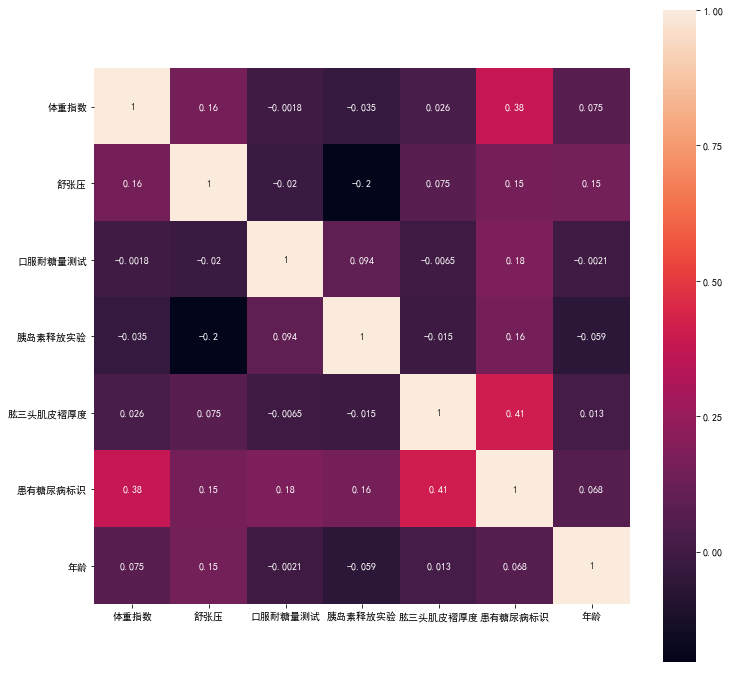

In [20]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train_df.corr(), square=True, annot=True, ax=ax)

In [21]:
count=pd.DataFrame(train_df['性别'].value_counts())
print(count)

     性别
0  2754
1  2316


In [22]:
count=pd.DataFrame(train_df['糖尿病家族史'].value_counts())
print(count)

                糖尿病家族史
无记录               2897
叔叔或姑姑有一方患有糖尿病     1084
父母有一方患有糖尿病         875
叔叔或者姑姑有一方患有糖尿病     214


In [23]:
dict_糖尿病家族史 = {
    '无记录': 0,
    '叔叔或姑姑有一方患有糖尿病': 1,
    '叔叔或者姑姑有一方患有糖尿病': 1,
    '父母有一方患有糖尿病': 2
}

train_df['糖尿病家族史'] = train_df['糖尿病家族史'].map(dict_糖尿病家族史)
test_df['糖尿病家族史'] = test_df['糖尿病家族史'].map(dict_糖尿病家族史)

In [24]:
from sklearn.preprocessing import OneHotEncoder
train_df=pd.get_dummies(train_df,columns=['性别'])
train_df=pd.get_dummies(train_df,columns=['糖尿病家族史'])
test_df=pd.get_dummies(test_df,columns=['性别'])
test_df=pd.get_dummies(test_df,columns=['糖尿病家族史'])

In [25]:
train_df.head()

,体重指数,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄,性别_0,性别_1,糖尿病家族史_0,糖尿病家族史_1,糖尿病家族史_2
0,30.1,106.000000,3.818,7.89,0.0,0,26,1,0,1,0,0
1,27.5,84.000000,-1.000,0.00,14.7,0,34,1,0,1,0,0
2,36.5,85.000000,7.131,0.00,40.1,1,34,0,1,1,0,0
3,29.5,91.000000,7.041,0.00,0.0,0,30,0,1,1,0,0
4,42.0,89.423595,7.134,0.00,0.0,1,24,1,0,0,1,0


In [26]:
test_df.columns

Index(['体重指数', '舒张压', '口服耐糖量测试', '胰岛素释放实验', '肱三头肌皮褶厚度', '年龄', '性别_0', '性别_1',
       '糖尿病家族史_0', '糖尿病家族史_1', '糖尿病家族史_2'],
      dtype='object')

In [27]:
train_df = train_df.drop(['性别_0','糖尿病家族史_0'],axis=1)
test_df = test_df.drop(['性别_0','糖尿病家族史_0'],axis=1)

In [28]:
def BMI(a):
    if a<18.5:
        return 0
    elif 18.5<=a<=24:
        return 1
    elif 24<a<=27:
        return 2
    elif 27<a<=32:
        return 3
    else:
        return 4
    
train_df['BMI']=train_df['体重指数'].apply(BMI)
test_df['BMI']=test_df['体重指数'].apply(BMI)

In [29]:
def DBP(a):
    if a<60:
        return 0
    elif 60<=a<=90:
        return 1
    elif a>90:
        return 2
    else:
        return a
train_df['DBP']=train_df['舒张压'].apply(DBP)
test_df['DBP']=test_df['舒张压'].apply(DBP)

In [30]:
train_df.columns

Index(['体重指数', '舒张压', '口服耐糖量测试', '胰岛素释放实验', '肱三头肌皮褶厚度', '患有糖尿病标识', '年龄',
       '性别_1', '糖尿病家族史_1', '糖尿病家族史_2', 'BMI', 'DBP'],
      dtype='object')

In [31]:
test_df.columns

Index(['体重指数', '舒张压', '口服耐糖量测试', '胰岛素释放实验', '肱三头肌皮褶厚度', '年龄', '性别_1',
       '糖尿病家族史_1', '糖尿病家族史_2', 'BMI', 'DBP'],
      dtype='object')

# 任务3：逻辑回归尝试

## 步骤1：导入sklearn中的逻辑回归

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 步骤2：使用训练集和逻辑回归进行训练，并在测试集上进行预测

In [33]:
x_train = train_df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11]]
y_train = train_df.iloc[:,[5]]
test = test_df

In [34]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [35]:
test.head()

,体重指数,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,年龄,性别_1,糖尿病家族史_1,糖尿病家族史_2,BMI,DBP
0,33.1,72.0,6.586,24.16,2.94,35,0,0,0,4,1
1,20.6,68.0,3.861,0.00,0.00,24,0,1,0,1,1
2,42.1,98.0,5.713,0.00,3.53,43,1,0,0,4,2
3,34.6,66.0,4.684,0.00,3.14,23,0,0,0,4,1
4,27.7,89.0,7.948,14.65,2.65,25,0,0,0,3,1


In [36]:
x_test = test

In [37]:
predict_y = pd.DataFrame(model.predict(x_test))
type(predict_y)

pandas.core.frame.DataFrame

In [38]:
predict_y.to_csv(path_or_buf=r'E:/学习/2021-2022学年学习文件/研一下课程文件/Python编程项目/糖尿病遗传风险预测挑战赛公开数据/预测结果.csv')

## 步骤3：将步骤2预测的结果文件提交到比赛，截图分数；
提交结果后，分数为：0.7154

## 步骤4：将训练集20%划分为验证集，在训练部分进行训练，在测试部分进行预测，调节逻辑回归的超参数；

In [39]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold

In [40]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(x_train, y_train, test_size = 0.20, random_state = 42)

In [41]:
X_train.shape

(4056, 11)

In [42]:
Y_train.shape

(4056, 1)

In [43]:
# scaling the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_validate_std = sc.fit_transform(X_validate)
x_test_std = sc.transform(x_test)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
penaltys=['l1','l2']
Cs=[0.1,1,10,100,1000]
#调优的参数集合，搜索网格为2x5，在网格上的交叉点进行搜索
tuned_parameters=dict(penalty=penaltys,C=Cs)

In [45]:
lr_penalty=LogisticRegression(solver='liblinear')
grid=GridSearchCV(lr_penalty,tuned_parameters,cv=3,scoring='neg_log_loss',n_jobs=4)
grid.fit(X_train,Y_train)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             scoring='neg_log_loss')

In [46]:
#examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.4125402257319069
{'C': 1000, 'penalty': 'l2'}


In [47]:
model1 = LogisticRegression(solver='liblinear', random_state=0,C=10,penalty='l1')
model1.fit(x_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, penalty='l1', random_state=0, solver='liblinear')

提交结果后得分为0.72093，略有提高，但无明显提升。

## 尝试决策树模型

In [48]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [49]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [50]:
y_pred_gini = clf_gini.predict(x_test)

In [51]:
predict_y = pd.DataFrame(clf_gini.predict(x_test))
type(predict_y)

pandas.core.frame.DataFrame

In [52]:
predict_y.to_csv(path_or_buf=r'E:/学习/2021-2022学年学习文件/研一下课程文件/Python编程项目/糖尿病遗传风险预测挑战赛公开数据/预测结果.csv')

再次提交结果，得分为0.87015，有显著提升。

# 任务4 特征工程

## 步骤1：统计每个性别对应的【体重指数】、【舒张压】平均值

In [53]:
train_df.groupby('性别_1')['体重指数'].mean()

性别_1
0    37.197603
1    38.925216
Name: 体重指数, dtype: float64

In [54]:
train_df.groupby('性别_1')['舒张压'].mean()

性别_1
0    88.786209
1    90.181523
Name: 舒张压, dtype: float64

In [55]:
train_df.columns

Index(['体重指数', '舒张压', '口服耐糖量测试', '胰岛素释放实验', '肱三头肌皮褶厚度', '患有糖尿病标识', '年龄',
       '性别_1', '糖尿病家族史_1', '糖尿病家族史_2', 'BMI', 'DBP'],
      dtype='object')

# 任务6：高阶树模型

## 步骤1：安装LightGBM，并学习基础的使用方法；

In [56]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)

# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

E:\Anaconda\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

In [57]:
# predict the results
y_pred=clf.predict(x_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9482


In [58]:
y_pred_train = clf.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [59]:
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))

Training set score: 1.0000


In [60]:
print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Test set score: 0.9482


In [61]:
predict_y = pd.DataFrame(clf.predict(test))
type(predict_y)

pandas.core.frame.DataFrame

In [62]:
predict_y.to_csv(path_or_buf=r'E:/学习/2021-2022学年学习文件/研一下课程文件/Python编程项目/糖尿病遗传风险预测挑战赛公开数据/预测结果.csv')

提交查看得分，结果为0.88918，略有提升。根据上述结果知现在模型存在过拟合。

In [63]:
# 模型交叉验证
def run_model_cv(model, kf, X_tr, y, X_te, cate_col=None):
    train_pred = np.zeros( (len(X_tr), len(np.unique(y))) )
    test_pred = np.zeros( (len(X_te), len(np.unique(y))) )

    cv_clf = []
    for tr_idx, val_idx in kf.split(X_tr, y):
        x_tr = X_tr.iloc[tr_idx]; y_tr = y.iloc[tr_idx]

        x_val = X_tr.iloc[val_idx]; y_val = y.iloc[val_idx]

        call_back = [
            lgb.early_stopping(50),
        ]
        eval_set = [(x_val, y_val)]
        model.fit(x_tr, y_tr, eval_set=eval_set, callbacks=call_back, verbose=-1)

        cv_clf.append(model)

        train_pred[val_idx] = model.predict_proba(x_val)
        test_pred += model.predict_proba(X_te)

    test_pred /= kf.n_splits
    return train_pred, test_pred, cv_clf


In [64]:
from sklearn.model_selection import KFold
clf = lgb.LGBMClassifier(
    max_depth=3, 
    n_estimators=4000, 
    n_jobs=-1, 
    verbose=-1,
    verbosity=-1,
    learning_rate=0.1,
)

train_pred, test_pred, cv_clf = run_model_cv(
    clf, KFold(n_splits=5),
    X_train,
    Y_train,
    test,
)

[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[396]	valid_0's binary_logloss: 0.0961495


E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[361]	valid_0's binary_logloss: 0.136538
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[273]	valid_0's binary_logloss: 0.0974009
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[193]	valid_0's binary_logloss: 0.139527
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
Training until validation scores don't improve for 50 rounds


E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

Early stopping, best iteration is:
[177]	valid_0's binary_logloss: 0.145929


In [65]:
cv_clf

[LGBMClassifier(max_depth=3, n_estimators=4000, verbose=-1, verbosity=-1),
 LGBMClassifier(max_depth=3, n_estimators=4000, verbose=-1, verbosity=-1),
 LGBMClassifier(max_depth=3, n_estimators=4000, verbose=-1, verbosity=-1),
 LGBMClassifier(max_depth=3, n_estimators=4000, verbose=-1, verbosity=-1),
 LGBMClassifier(max_depth=3, n_estimators=4000, verbose=-1, verbosity=-1)]

In [66]:
predict_y = pd.DataFrame(test_pred.argmax(1))

In [67]:
predict_y.to_csv(path_or_buf=r'E:/学习/2021-2022学年学习文件/研一下课程文件/Python编程项目/糖尿病遗传风险预测挑战赛公开数据/预测结果.csv')

再次提交结果，得分为0.91837.

# 任务7：多折训练与集成

使用交叉验证训练5个机器学习模型（svm、lr等），使用stacking完成集成，将最新预测的结果文件提交到比赛，截图分数

## 尝试随机森林

In [68]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)
# fit the model

rfc.fit(X_train, Y_train)

# Predict the Test set results

y_pred = rfc.predict(test)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [69]:
predict_y = pd.DataFrame(rfc.predict(test))

In [70]:
predict_y.to_csv(path_or_buf=r'E:/学习/2021-2022学年学习文件/研一下课程文件/Python编程项目/糖尿病遗传风险预测挑战赛公开数据/预测结果.csv')

In [71]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, Y_train)



# Predict on the test set results

y_pred_100 = pd.DataFrame(rfc_100.predict(test))

y_pred_100.to_csv(path_or_buf=r'E:/学习/2021-2022学年学习文件/研一下课程文件/Python编程项目/糖尿病遗传风险预测挑战赛公开数据/预测结果.csv')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


再次提交，得分为0.96224.

## 基于随机森林对特征重要性进行排序

In [72]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set

clf.fit(X_train, Y_train)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=0)

In [73]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

体重指数        0.336974
肱三头肌皮褶厚度    0.240891
口服耐糖量测试     0.159251
舒张压         0.115227
胰岛素释放实验     0.076328
年龄          0.034214
BMI         0.017591
DBP         0.005615
性别_1        0.005442
糖尿病家族史_2    0.004802
糖尿病家族史_1    0.003665
dtype: float64

In [74]:
# Build the Random Forest model on selected features

In [75]:
# drop the least important feature from X_train and X_test
X_train = X_train.drop(['糖尿病家族史_1'], axis=1)

test = test.drop(['糖尿病家族史_1'], axis=1)

In [76]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, Y_train)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(random_state=0)

In [77]:
y_pred = pd.DataFrame(clf.predict(test))
y_pred.to_csv(path_or_buf=r'E:/学习/2021-2022学年学习文件/研一下课程文件/Python编程项目/糖尿病遗传风险预测挑战赛公开数据/预测结果.csv')

## 尝试使用集成方法

In [78]:
#import libraries
from os import path

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12,8

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from xgboost import XGBClassifier
import xgboost as xgb


#Common Model Helpers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score

#stacking
from sklearn.model_selection import KFold

#hyperparameter tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Some useful parameters which will come in handy later on
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, params=None):
#        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [80]:
#function to get the out of fold predictions for each of the base models
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

### Logistic Regression CV

In [81]:
#create lists of values for hyperparameters to tune using param_grid
grid_C = [100, 10, 1.0, 0.1, 0.01]

#split dataset in cross-validation with this splitter class: 
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#base model
LR = linear_model.LogisticRegressionCV()
base_results = model_selection.cross_validate(LR, X_train, Y_train, cv  = cv_split, return_train_score=True)
LR.fit(X_train, Y_train)

print('BEFORE LR Parameters: ', LR.get_params())
print("BEFORE LR Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE LR Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE LR Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)


#tune hyper-parameters:
param_grid = {'Cs': grid_C,  
              'penalty': ['none', 'l1', 'l2', 'elasticnet'], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
           }

#choose best model with grid_search: 
tune_model = model_selection.GridSearchCV(LR, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(X_train, Y_train)

print('AFTER LR Parameters: ', tune_model.best_params_)
print("AFTER LR Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER LR Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER LR Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE LR Parameters:  {'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
BEFORE LR Training w/bin score mean: 83.77
BEFORE LR Test w/bin score mean: 83.93
BEFORE LR Test w/bin score 3*std: +/- 2.08
----------
AFTER LR Parameters:  {'Cs': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
AFTER LR Training w/bin score mean: 87.93
AFTER LR Test w/bin score mean: 88.07
AFTER LR Test w/bin score 3*std: +/- 3.05
----------


### K Neighbours Classifier

In [82]:
#create lists of values for hyperparameters to tune using param_grid
grid_neighbors = [1,5,9,13,17,21,30,50]

#split dataset in cross-validation with this splitter class:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#base model
KN = neighbors.KNeighborsClassifier()
base_results = model_selection.cross_validate(KN, X_train, Y_train, cv  = cv_split, return_train_score=True)
KN.fit(X_train, Y_train)

print('BEFORE KN Parameters: ', KN.get_params())
print("BEFORE KN Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE KN Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE KN Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)


#tune hyper-parameters:
param_grid = {'n_neighbors': grid_neighbors  
           }

#choose best model with grid_search

tune_model = model_selection.GridSearchCV(KN, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(X_train, Y_train)

print('AFTER KN Parameters: ', tune_model.best_params_)
print("AFTER KN Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER KN Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER KN Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))


BEFORE KN Parameters:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
BEFORE KN Training w/bin score mean: 92.15
BEFORE KN Test w/bin score mean: 89.24
BEFORE KN Test w/bin score 3*std: +/- 1.93
----------
AFTER KN Parameters:  {'n_neighbors': 21}
AFTER KN Training w/bin score mean: 95.84
AFTER KN Test w/bin score mean: 94.44
AFTER KN Test w/bin score 3*std: +/- 1.97


### Random Forest

In [83]:
#split training data into training and validation set
X_training, X_val, y_training, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [84]:
#function to explore individual hyperparameters so that final param grid can be more finely tuned to save computation time
def explore_RF_hyperparameters(hyperparameter, hyperparameter_values, scoring='accuracy'):

    param_grid = [{hyperparameter: hyperparameter_value} for hyperparameter_value in hyperparameter_values]
    score_training_data = []
    score_val_data = []

    for i, _ in enumerate(hyperparameter_values):
        clf = RandomForestClassifier(random_state=0, **param_grid[i])
        clf.fit(X_training, y_training)
        scorer = metrics.get_scorer(scoring)
        score_training_data.append(scorer(clf, X_training, y_training))
        score_val_data.append(scorer(clf, X_val, y_val))

    plt.plot(hyperparameter_values, score_training_data)
    plt.plot(hyperparameter_values, score_val_data)
    plt.legend(['Training Data', 'Validation Data'])
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Score')
    plt.show()

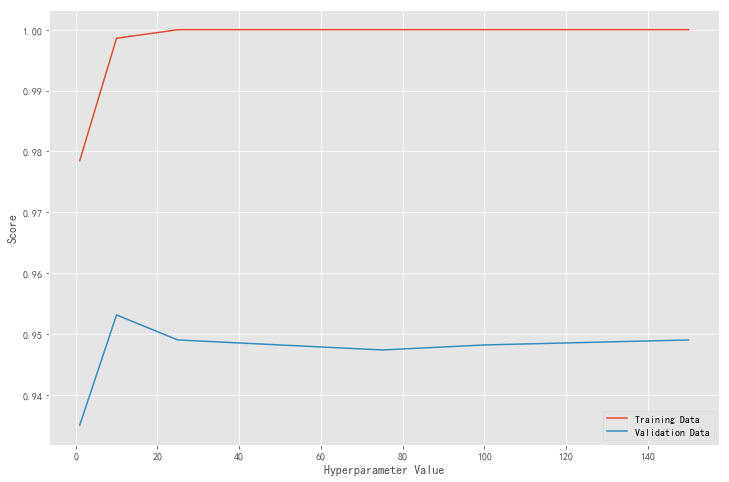

In [85]:
#varying the number of estimators   
explore_RF_hyperparameters(
    hyperparameter="n_estimators",
    hyperparameter_values = [1, 10, 25, 50, 75, 100, 150]
)

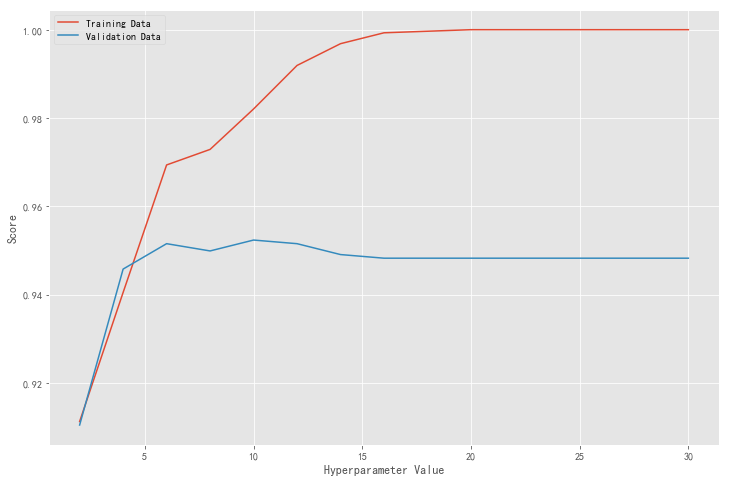

In [86]:
#varying the max depth 
explore_RF_hyperparameters(
    hyperparameter="max_depth",
    hyperparameter_values = [2, 4, 6, 8, 10, 12, 14, 16 , 20, 30]
)

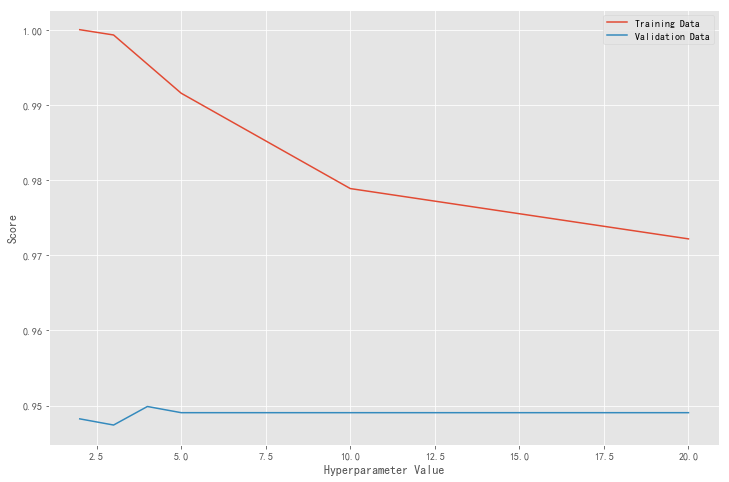

In [87]:
#varying the min samples per split
explore_RF_hyperparameters(
    hyperparameter="min_samples_split",
    hyperparameter_values = [ 2, 3, 4, 5,10,20]
)

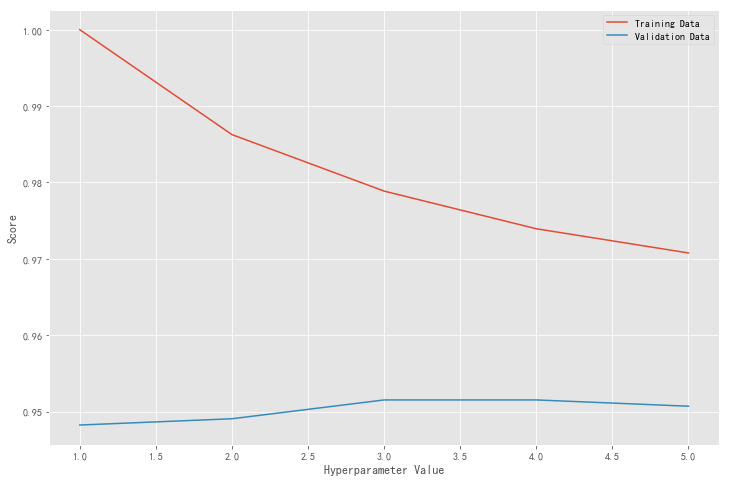

In [88]:
#varying the min samples per leaf
explore_RF_hyperparameters(
    hyperparameter="min_samples_leaf",
    hyperparameter_values = [1, 2, 3, 4, 5]
)

In [89]:
#create lists of values for hyperparameters to tune using param_grid
grid_n_estimator = [ 10, 20, 30]
grid_max_depth = [ 8, 10, 12]
grid_seed = [0]
grid_split = [5,10,15]
grid_leaf = [2,3]

#split dataset in cross-validation with this splitter class:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#base model
RF = ensemble.RandomForestClassifier()
base_results = model_selection.cross_validate(RF, X_train, Y_train, cv  = cv_split, return_train_score=True)
RF.fit(X_train, Y_train)

print('BEFORE RF Parameters: ', RF.get_params())
print("BEFORE RF Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE RF Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE RF Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

#tune hyper-parameters:
param_grid = {'n_estimators': grid_n_estimator,  
              'criterion': ['gini', 'entropy'], 
              'max_depth': grid_max_depth,    
              'random_state': grid_seed,
              'min_samples_split': grid_split,
              'min_samples_leaf': grid_leaf,
              'max_features': ['auto', 'sqrt', 'log2']
           }


#choose best model with grid_search: 
tune_model = model_selection.GridSearchCV(RF, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(X_train, Y_train)

print('AFTER RF Parameters: ', tune_model.best_params_)
print("AFTER RF Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER RF Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER RF Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


BEFORE RF Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE RF Training w/bin score mean: 100.00
BEFORE RF Test w/bin score mean: 96.01
BEFORE RF Test w/bin score 3*std: +/- 1.63
----------
AFTER RF Parameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30, 'random_state': 0}
AFTER RF Training w/bin score mean: 99.82
AFTER RF Test w/bin score mean: 99.13
AFTER RF Test w/bin score 3*std: +/- 0.60
----------


### Extra Trees

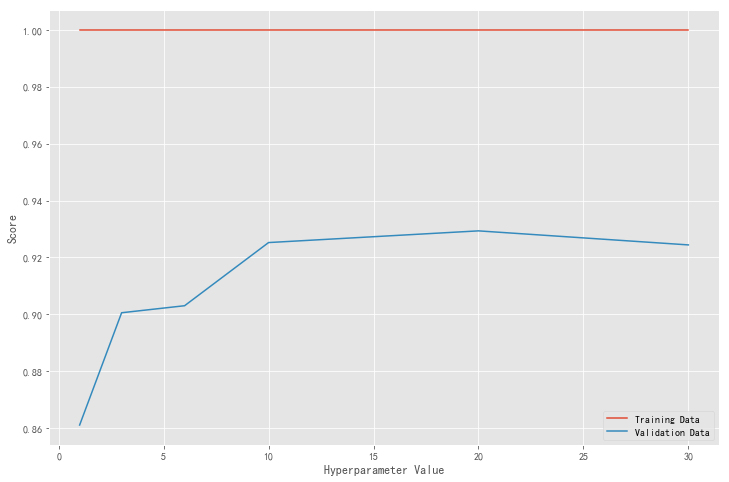

In [90]:
#function to explore individual hyperparameters so that final param grid can be more finely tuned to save computation time
def explore_ET_hyperparameters(hyperparameter, hyperparameter_values, scoring='accuracy'):

    param_grid = [{hyperparameter: hyperparameter_value} for hyperparameter_value in hyperparameter_values]
    score_training_data = []
    score_val_data = []

    for i, _ in enumerate(hyperparameter_values):
        clf = ExtraTreesClassifier(random_state=0, **param_grid[i])
        clf.fit(X_training, y_training)
        scorer = metrics.get_scorer(scoring)
        score_training_data.append(scorer(clf, X_training, y_training))
        score_val_data.append(scorer(clf, X_val, y_val))

    plt.plot(hyperparameter_values, score_training_data)
    plt.plot(hyperparameter_values, score_val_data)
    plt.legend(['Training Data', 'Validation Data'])
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Score')
    plt.show()

#varying the number of estimators   
explore_ET_hyperparameters(
    hyperparameter="n_estimators",
    hyperparameter_values = [1,3,6, 10, 20,30]
)
    

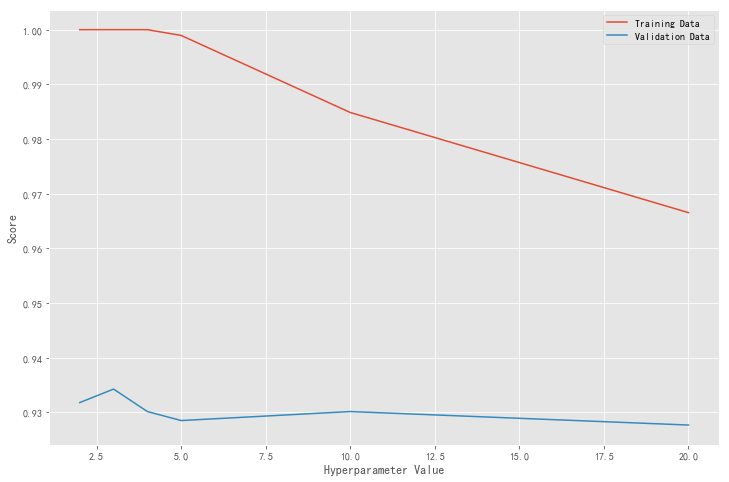

In [91]:
#varying the min samples per split
explore_ET_hyperparameters(
    hyperparameter="min_samples_split",
    hyperparameter_values = [ 2, 3, 4, 5,10,20]
)

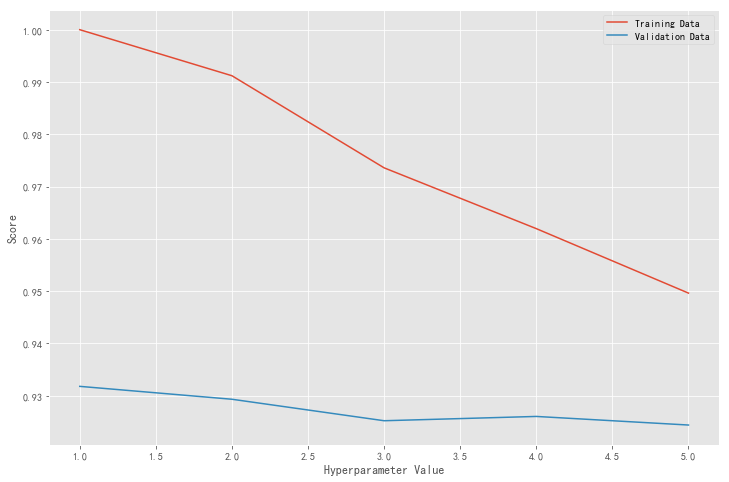

In [92]:
#varying the min samples per leaf
explore_ET_hyperparameters(
    hyperparameter="min_samples_leaf",
    hyperparameter_values = [1, 2, 3, 4, 5]
)

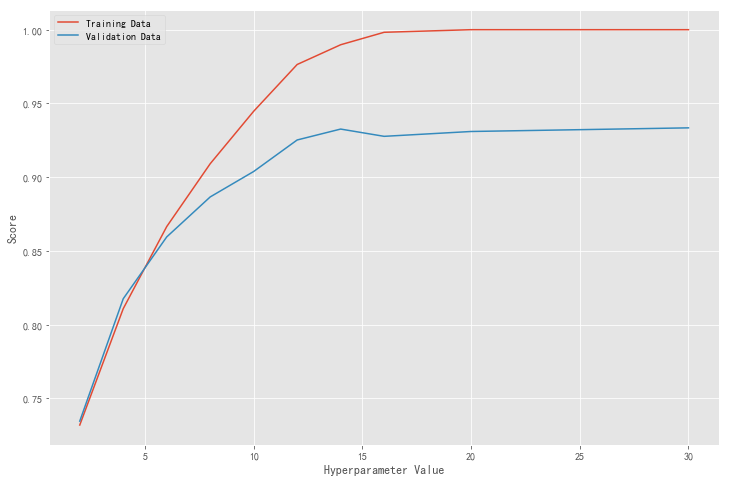

In [93]:
#varying the max depth 
explore_ET_hyperparameters(
    hyperparameter="max_depth",
    hyperparameter_values = [2, 4, 6, 8, 10, 12, 14, 16 , 20, 30]
)

In [94]:
#create lists of values for hyperparameters to tune using param_grid
grid_n_estimator = [ 6, 10, 14]
grid_max_depth = [ 8, 10, 12]
grid_seed = [0]
grid_split = [5,10,15]
grid_leaf = [2,3,4]

#split dataset in cross-validation with this splitter class:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#base model
ET = ensemble.ExtraTreesClassifier()
base_results = model_selection.cross_validate(ET, X_train, Y_train, cv  = cv_split, return_train_score=True)
ET.fit(X_train, Y_train)

print('BEFORE ET Parameters: ', ET.get_params())
print("BEFORE ET Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE ET Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE ET Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

#tune hyper-parameters:
param_grid = {'n_estimators': grid_n_estimator,  
              'criterion': ['gini', 'entropy'], 
              'max_depth': grid_max_depth,    
              'random_state': grid_seed,
              'min_samples_split': grid_split,
              'min_samples_leaf': grid_leaf,
              'max_features': ['auto', 'sqrt', 'log2']
           }

#choose best model with grid_search: 
tune_model = model_selection.GridSearchCV(ET, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(X_train, Y_train)

print('AFTER ET Parameters: ', tune_model.best_params_)
print("AFTER ET Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER ET Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER ET Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


BEFORE ET Parameters:  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE ET Training w/bin score mean: 100.00
BEFORE ET Test w/bin score mean: 93.42
BEFORE ET Test w/bin score 3*std: +/- 1.73
----------
AFTER ET Parameters:  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 14, 'random_state': 0}
AFTER ET Training w/bin score mean: 99.46
AFTER ET Test w/bin score mean: 97.27
AFTER ET Test w/bin score 3*std: +/- 0.81
----------


### AdaBoost

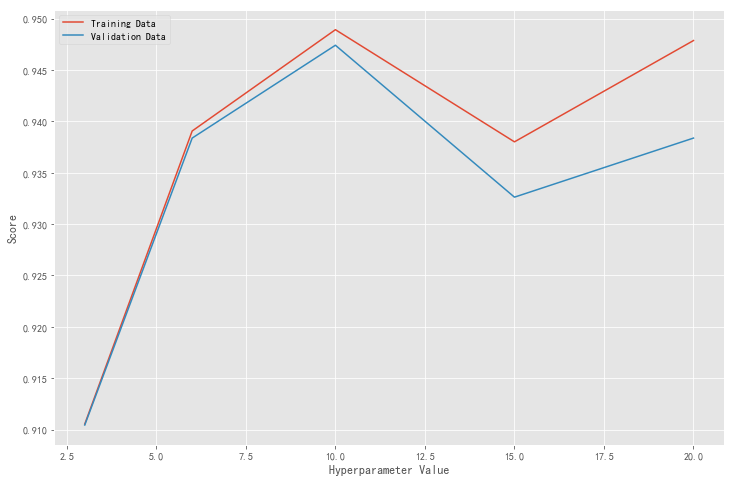

In [95]:
#function to explore individual hyperparameters so that final param grid can be more finely tuned to save computation time
def explore_ADA_hyperparameters(hyperparameter, hyperparameter_values, scoring='accuracy'):

    param_grid = [{hyperparameter: hyperparameter_value} for hyperparameter_value in hyperparameter_values]
    score_training_data = []
    score_val_data = []

    for i, _ in enumerate(hyperparameter_values):
        clf = AdaBoostClassifier(random_state=0, **param_grid[i])
        clf.fit(X_training, y_training)
        scorer = metrics.get_scorer(scoring)
        score_training_data.append(scorer(clf, X_training, y_training))
        score_val_data.append(scorer(clf, X_val, y_val))

    plt.plot(hyperparameter_values, score_training_data)
    plt.plot(hyperparameter_values, score_val_data)
    plt.legend(['Training Data', 'Validation Data'])
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Score')
    plt.show()

#varying the number of estimators   
explore_ADA_hyperparameters(
    hyperparameter="n_estimators",
    hyperparameter_values = [3,6,10,15,20]
)


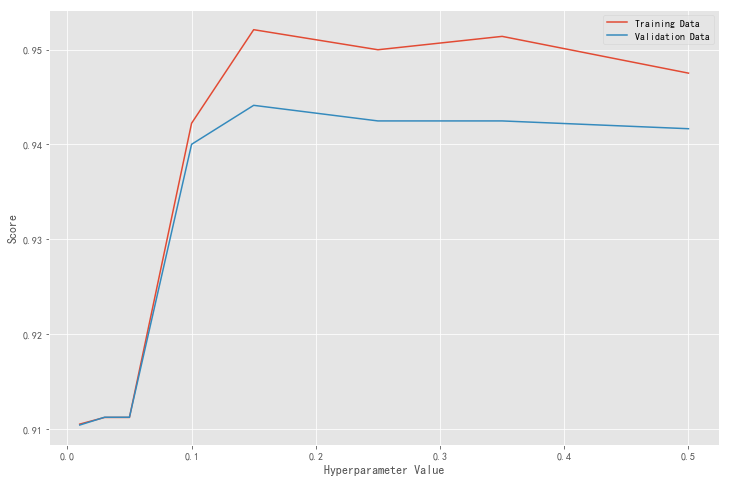

In [96]:
#varying the learning rate   
explore_ADA_hyperparameters(
    hyperparameter="learning_rate",
    hyperparameter_values = [.01, .03, .05, .1, .15, .25, 0.35, 0.5]
)

In [97]:
#create lists of values for hyperparameters to tune using param_grid
grid_n_estimator = [ 6, 8, 10, 12]
grid_learn = [ 0.25, 0.3, 0.35, 0.4]

#split dataset in cross-validation with this splitter class:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#base model
ADA = ensemble.AdaBoostClassifier()
base_results = model_selection.cross_validate(ADA, X_train, Y_train, cv  = cv_split, return_train_score=True)
ADA.fit(X_train, Y_train)

print('BEFORE ADA Parameters: ', ADA.get_params())
print("BEFORE ADA Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE ADA Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE ADA Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)


#tune hyper-parameters:
param_grid = {'n_estimators': grid_n_estimator,  
              'learning_rate': grid_learn
           }

#choose best model with grid_search:
tune_model = model_selection.GridSearchCV(ADA, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(X_train, Y_train)

print('AFTER ADA Parameters: ', tune_model.best_params_)
print("AFTER ADA Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER ADA Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER ADA Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE ADA Parameters:  {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
BEFORE ADA Training w/bin score mean: 94.68
BEFORE ADA Test w/bin score mean: 93.85
BEFORE ADA Test w/bin score 3*std: +/- 1.22
----------
AFTER ADA Parameters:  {'learning_rate': 0.4, 'n_estimators': 12}
AFTER ADA Training w/bin score mean: 98.00
AFTER ADA Test w/bin score mean: 97.72
AFTER ADA Test w/bin score 3*std: +/- 1.83
----------


## SVC

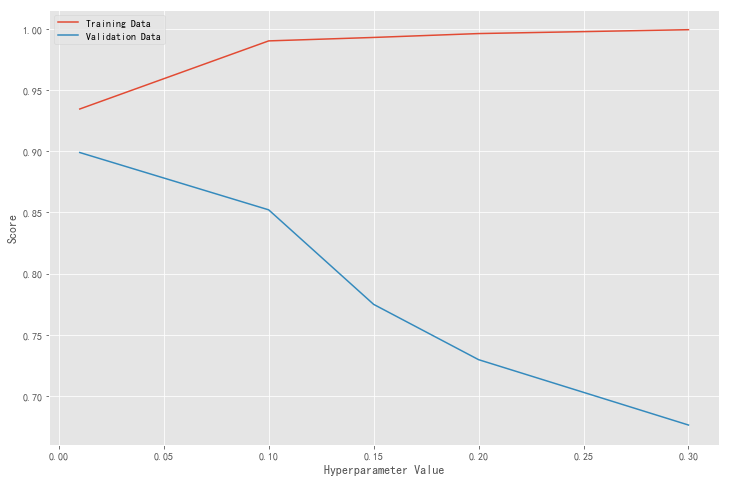

In [98]:
#function to explore individual hyperparameters so that final param grid can be more finely tuned to save computation time
def explore_SVC_hyperparameters(hyperparameter, hyperparameter_values, scoring='accuracy'):

    param_grid = [{hyperparameter: hyperparameter_value} for hyperparameter_value in hyperparameter_values]
    score_training_data = []
    score_val_data = []

    for i, _ in enumerate(hyperparameter_values):
        clf = SVC(random_state=0, **param_grid[i])
        clf.fit(X_training, y_training)
        scorer = metrics.get_scorer(scoring)
        score_training_data.append(scorer(clf, X_training, y_training))
        score_val_data.append(scorer(clf, X_val, y_val))

    plt.plot(hyperparameter_values, score_training_data)
    plt.plot(hyperparameter_values, score_val_data)
    plt.legend(['Training Data', 'Validation Data'])
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Score')
    plt.show()

#varying gamma 
explore_SVC_hyperparameters(
    hyperparameter="gamma",
    hyperparameter_values = [0.3, 0.2,0.15,0.1,0.01]
)


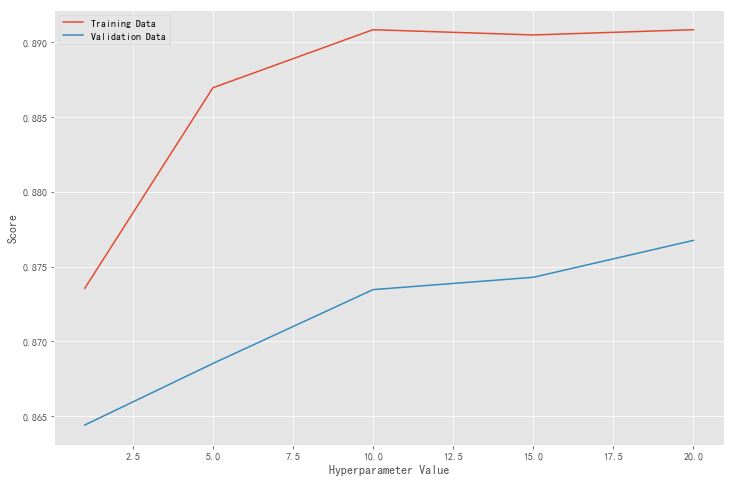

In [99]:
#varying C 
explore_SVC_hyperparameters(
    hyperparameter="C",
    hyperparameter_values = [1,5,10,15,20]
)

In [ ]:
#create lists of values for hyperparameters to tune using param_grid
grid_C = [5,10,15]
grid_gamma = [0.125, 0.175,]

#split dataset in cross-validation with this splitter class:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#base model
SVC_mla = svm.SVC()
base_results = model_selection.cross_validate(SVC_mla, X_train, Y_train, cv  = cv_split, return_train_score=True)
SVC_mla.fit(X_train, Y_train)

print('BEFORE SVC Parameters: ', SVC_mla.get_params())
print("BEFORE SVC Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE SVC Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE SVC Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)


#tune hyper-parameters:
param_grid = {'C': grid_C,  
              'gamma': grid_gamma,
              'kernel': ['rbf', 'poly', 'sigmoid']
           }

#choose best model with grid_search: 
tune_model = model_selection.GridSearchCV(SVC_mla, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(X_train, Y_train)

print('AFTER SVC Parameters: ', tune_model.best_params_)
print("AFTER SVC Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER SVC Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER SVC Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE SVC Parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
BEFORE SVC Training w/bin score mean: 86.91
BEFORE SVC Test w/bin score mean: 87.17
BEFORE SVC Test w/bin score 3*std: +/- 2.91
----------


### Create Ensemble

AFTER RF Parameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 30, 'random_state': 0}
AFTER ET Parameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 14, 'random_state': 0}
AFTER LR Parameters:  {'Cs': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_estimators': 30,
    'max_depth': 12,
    'min_samples_leaf': 2,
    'min_samples_split' : 15,
    'random_state' : 0,
    'criterion' : 'entropy',
    'max_features' : 'auto'
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators': 14,
    'max_features': 'auto',
    'random_state' : 0,    
    'max_depth': 12,
    'min_samples_leaf': 2,
    'min_samples_split' : 10,
    'criterion': 'entropy'
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 12,
    'learning_rate' : 0.4
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 150,
    'max_depth': 4,
    'learning_rate': 0.05,
    'criterion' : 'mse',
    'loss' : 'exponential'
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'rbf',
    'gamma' : 0.125,
    'C' : 5
    }

# LogisticRegressionCV parameters 
lr_params = {
    'solver' : 'newton-cg',
    'penalty' : 'l2',
    'Cs' : 10
    }

# K Neighbours Classifier parameters 
kn_params = {
    'n_neighbors' : 21
    }

In [ ]:
# Create objects that represent our models
rf = SklearnHelper(clf=RandomForestClassifier, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, params=gb_params)
svc = SklearnHelper(clf=SVC, params=svc_params)
kn = SklearnHelper(clf=KNeighborsClassifier, params=kn_params)
lr = SklearnHelper(clf=LogisticRegressionCV, params=lr_params)

In [ ]:
# Create Numpy arrays of train, test and target dataframes to feed into our models
y_train = train['Transported'].ravel()
x_train = train[x_bin].values # Creates an array of the train data
x_test = test[x_bin].values # Creats an array of the test data

In [ ]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier
kn_oof_train, kn_oof_test = get_oof(kn,x_train, y_train, x_test) # K Neighbours Classifier
lr_oof_train, lr_oof_test = get_oof(lr,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

In [ ]:
#calculate feature importances
rf_feature = rf.feature_importances(x_train,y_train)
#et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

In [ ]:
#'SVC' and 'KNN' and 'LR' object has no attribute 'feature_importances_' so cant do this for it
rf_features = [0.08149851, 0.12141756, 0.0263793,  0.03566973, 0.0617103,  0.06694308, 0.04148718, 0.10507952, 0.10221604, 0.22752182, 0.13007695]
#et_features = [0.10643321, 0.21578448, 0.02627657, 0.02819634, 0.00356097, 0.10891651, 0.04835752, 0.04423012, 0.11609769, 0.09899834, 0.1021764,  0.01659244, 0.08437942]
ada_features = [0.16666667, 0.08333333, 0, 0, 0.16666667, 0, 0, 0.25, 0.16666667, 0.08333333, 0.08333333]
gb_features = [0.03516087, 0.05529047, 0.01330023, 0.01630864, 0.04191415, 0.07767739, 0.04371369, 0.07383201, 0.07372111, 0.45403183, 0.11504961]

In [ ]:
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': x_bin,
     'Random Forest feature importances': rf_features,
     #'Extra Trees  feature importances': et_features,
     'AdaBoost feature importances': ada_features,
     'Gradient Boost feature importances': gb_features
    })

In [ ]:
# Scatter plot of feature importances
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [ ]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [ ]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [ ]:
# Create the new column containing the average of values
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

In [ ]:
#a plot of the average feature importances across the models
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

In [ ]:
#create base predictions
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     #'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
     'GradientBoost': gb_oof_train.ravel(),
     'SVC': svc_oof_train.ravel(),
     'KNeighbours': kn_oof_train.ravel(),
     'LogisticRegression': lr_oof_train.ravel()
    })
base_predictions_train.head()

In [ ]:
#plot correlation between the models
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [ ]:
#create new train and test sets with the guesses from our ensemble
x_train_ensemble = np.concatenate(( lr_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train, kn_oof_train), axis=1)
x_test_ensemble = np.concatenate(( lr_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test, kn_oof_test), axis=1)

### Tune Hyperparameters for XGBoost

In [ ]:
X_training_ensemble, X_val_ensemble, y_training, y_val = train_test_split(x_train_ensemble, y_train, test_size=0.3, random_state=42)

In [ ]:
#function to explore individual hyperparameters so that final param grid can be more finely tuned to save computation time
def explore_XGB_hyperparameters(hyperparameter, hyperparameter_values, scoring='accuracy'):

    param_grid = [{hyperparameter: hyperparameter_value} for hyperparameter_value in hyperparameter_values]
    score_training_data = []
    score_val_data = []

    for i, _ in enumerate(hyperparameter_values):
        clf = XGBClassifier(random_state=0, **param_grid[i])
        clf.fit(X_training_ensemble, y_training)
        scorer = metrics.get_scorer(scoring)
        score_training_data.append(scorer(clf, X_training_ensemble, y_training))
        score_val_data.append(scorer(clf, X_val_ensemble, y_val))

    plt.plot(hyperparameter_values, score_training_data)
    plt.plot(hyperparameter_values, score_val_data)
    plt.legend(['Training Data', 'Validation Data'])
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Score')
    plt.show()

#varying gamma 
explore_XGB_hyperparameters(
    hyperparameter="gamma",
    hyperparameter_values = [0.1,1,10,20,50,100]
)

In [ ]:
#varying max depth 
explore_XGB_hyperparameters(
    hyperparameter="max_depth",
    hyperparameter_values = [1,10,20,50]
)

In [ ]:
#varying reg_alpa 
explore_XGB_hyperparameters(
    hyperparameter="reg_alpha",
    hyperparameter_values = [1,10,20,50,100]
)

In [ ]:
#varying colsample_bytree 
explore_XGB_hyperparameters(
    hyperparameter="colsample_bytree",
    hyperparameter_values = [0,0.1,0.5,1]
)

In [ ]:
#varying min_child_weight 
explore_XGB_hyperparameters(
    hyperparameter="min_child_weight",
    hyperparameter_values = [0,5,10,20,35,50,100]
)

In [ ]:
#varying n_estimators 
explore_XGB_hyperparameters(
    hyperparameter="n_estimators",
    hyperparameter_values = [5,10,20,50,100]
)

In [ ]:
#varying learning_rate 
explore_XGB_hyperparameters(
    hyperparameter="learning_rate",
    hyperparameter_values = [0,0.001,0.01,0.03,0.05,0.1,0.15,0.2,1]
)

In [ ]:
#varying subsample 
explore_XGB_hyperparameters(
    hyperparameter="subsample",
    hyperparameter_values = [0,0.005,0.05, 0.1,0.3,0.5,0.7,1]
)

In [ ]:
#create hyperparameter space for the values during tuning to be selected from
space={'max_depth': hp.quniform("max_depth", 1, 10, 1),
        'gamma': hp.uniform ('gamma', 20,80),
        'reg_alpha' : hp.quniform('reg_alpha', 1,50,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0,0.5),
        'min_child_weight' : hp.quniform('min_child_weight', 15, 60, 1),
        'n_estimators': hp.quniform('n_estimators', 20, 50, 1),
        'learning_rate': hp.uniform('learning_rate', 0, 1),
        'subsample' : hp.uniform('subsample', 0,1),
        'seed': 0
    }

In [ ]:
#function to run XGBClassifier with hyperparameter values from 'space' and report the accuracy
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_training_ensemble, y_training), ( X_val_ensemble, y_val)]
    
    clf.fit(X_training_ensemble, y_training,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_val_ensemble)
    accuracy = accuracy_score(y_val, pred>0.5)
    print (accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
#run a large number of trials constantly varying the hyperparameters and record the best
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 300,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

### Submit Result

In [ ]:
#ensemble stacking method
gbm = xgb.XGBClassifier(
 learning_rate = 0.21281278494916178,
 n_estimators= 35,
 max_depth= 3,
 min_child_weight= 40,
 gamma=67.88907727191975,                        
 subsample=0.2578100761390425,
 colsample_bytree=0.28157458518226625,
 #objective= 'binary:logistic',
 nthread= -1,
 reg_alpha=19,
 reg_lambda=0.6944927032686287
 #scale_pos_weight=1
).fit(x_train_ensemble, y_train)
predictions = gbm.predict(x_test_ensemble)

In [ ]:
#Generate Submission File 
Submission = pd.DataFrame({ 'PassengerId': test.PassengerId,'Transported': predictions })
Submission.to_csv("submission.csv", index=False)